### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Load the data

In [2]:
bank_data = pd.read_csv('bank.csv')

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Luckily for us, there are no missing values, so we move!

In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In the 'pdays' column, it is observed that -1 makes more than 50% of the values of the column. It could mean that the client wasn't contacted before or stands for missing data. But since we are not sure exactly what -1 means I suggest to drop this column for our decision making.



In [5]:
len (bank_data[bank_data['campaign'] > 34] ) / len(bank_data) * 100

0.035835871707579285


Let us divide the attributes into categorical and numerical and check them out differently.

### Categorical Features

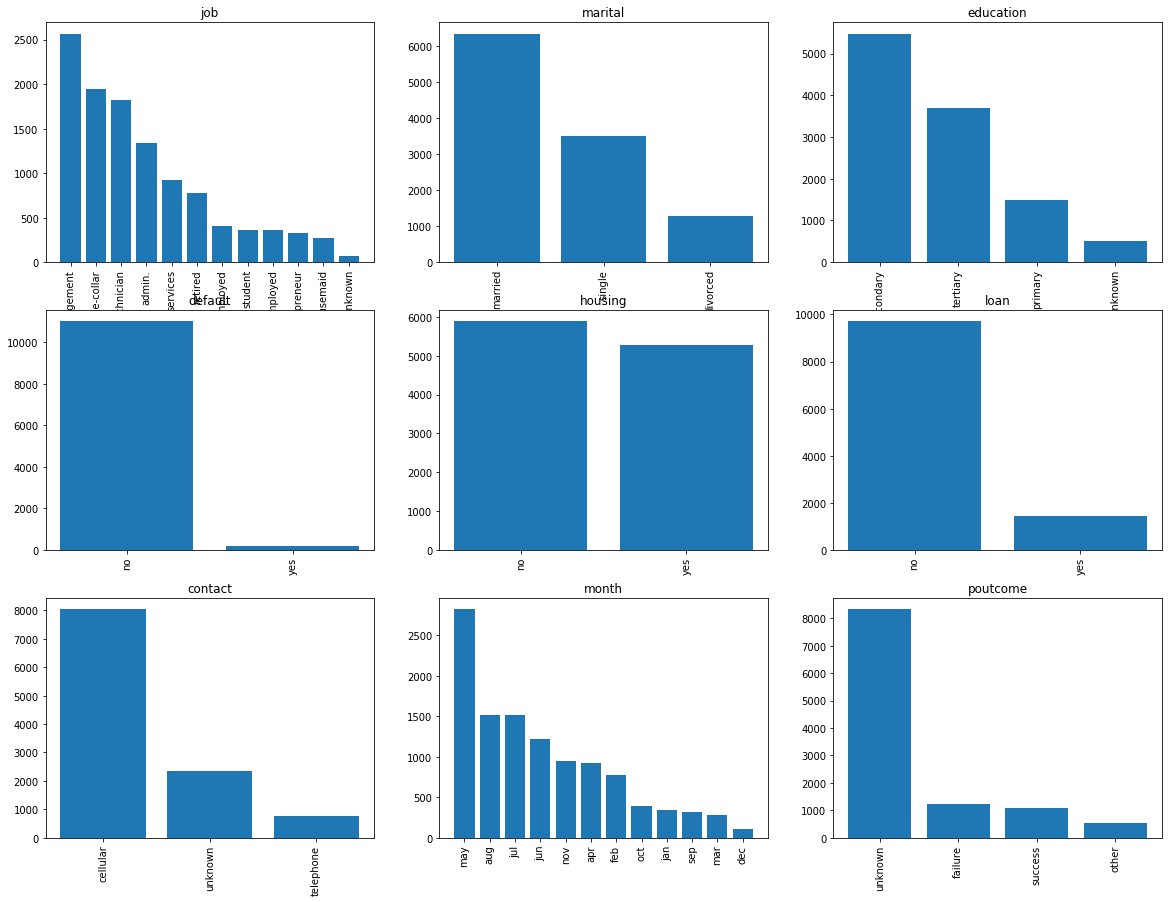

In [6]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
counter = 0
for feature in cat_features:
    value_counts = bank_data[feature].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(feature)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1


plt.show()

Before we start plotting the 'deposit' column against others, let us first check out how many 'yes' and 'no's we have

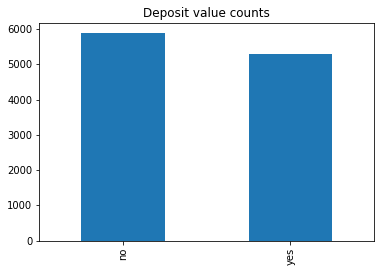

In [7]:
value_counts = bank_data['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close.

Let's see how 'deposit' column value varies with other categorical columns' values:

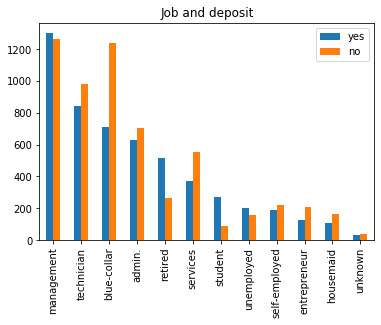

In [8]:
#job and deposit
job_dep = pd.DataFrame()

job_dep['yes'] = bank_data[bank_data['deposit'] == 'yes']['job'].value_counts()
job_dep['no'] = bank_data[bank_data['deposit'] == 'no']['job'].value_counts()

job_dep.plot.bar(title = 'Job and deposit')

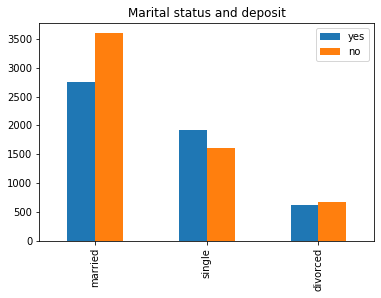

In [9]:
#marital status and deposit

mar_dep = pd.DataFrame()

mar_dep['yes'] = bank_data[bank_data['deposit'] == 'yes']['marital'].value_counts()
mar_dep['no'] = bank_data[bank_data['deposit'] == 'no']['marital'].value_counts()

mar_dep.plot.bar(title = 'Marital status and deposit')

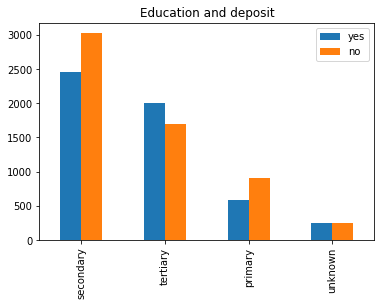

In [10]:
#Education and deposit
edu_dep = pd.DataFrame()

edu_dep['yes'] = bank_data[bank_data['deposit'] == 'yes']['education'].value_counts()
edu_dep['no'] = bank_data[bank_data['deposit'] == 'no']['education'].value_counts()

edu_dep.plot.bar(title = 'Education and deposit')

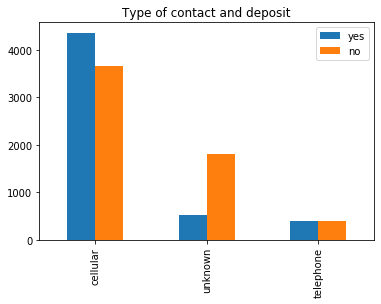

In [11]:
#Type of contact and deposit
con_dep = pd.DataFrame()

con_dep['yes'] = bank_data[bank_data['deposit'] == 'yes']['contact'].value_counts()
con_dep['no'] = bank_data[bank_data['deposit'] == 'no']['contact'].value_counts()

con_dep.plot.bar(title = 'Type of contact and deposit')

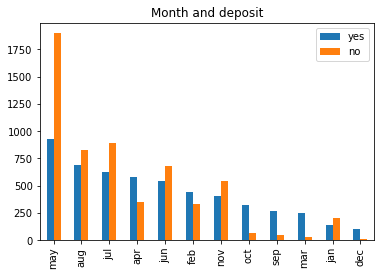

In [12]:
#Month and deposit
mon_dep = pd.DataFrame()

mon_dep['yes'] = bank_data[bank_data['deposit'] == 'yes']['month'].value_counts()
mon_dep['no'] = bank_data[bank_data['deposit'] == 'no']['month'].value_counts()

mon_dep.plot.bar(title = 'Month and deposit')

### Numerical Categories

Now, we repeat for numerical features.

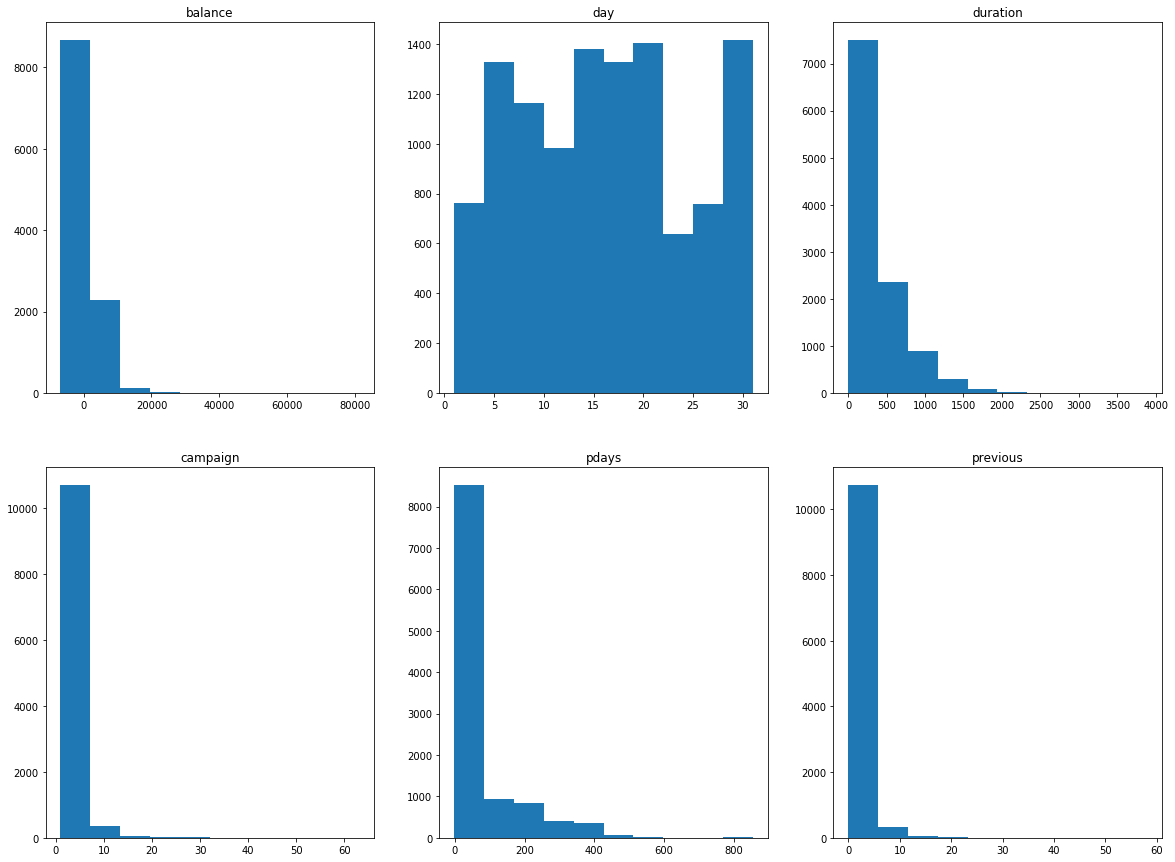

In [13]:
num_features = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))
counter = 0
for num_feature in num_features:
   
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bank_data[num_feature])
    
    axs[trace_x, trace_y].set_title(num_feature)
    
    
    counter += 1


plt.show()

The numerical features have outliers(noise). We can take the analysis forward and how we can go around the noise

I would like to map the 'deposit' column as having 0's and 1's

In [14]:
data = bank_data.copy()
data['deposit_num'] = data['deposit'].map({'no': 0, 'yes':1})

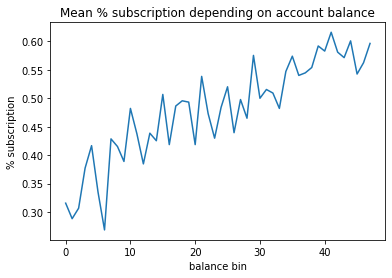

In [15]:
#introduce new column 'balance_bins' to  
data['balance_bins'] = pd.qcut(data['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_bins' and find average campaign outcome per balance bin
mean_deposit = data.groupby(['balance_bins'])['deposit_num'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bin')
plt.ylabel('% subscription')
plt.show()

In [16]:
data[data['balance_bins'] == 35]['balance'].min()

1627

From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance ranging from around 1627$ and above. These people have more spare cash to invest in fixed deposit.

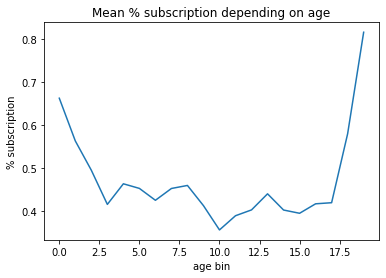

In [17]:
#introduce new column 'age_buckets' to  ''
data['age_bins'] = pd.qcut(data['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_bins' and find average campaign outcome per balance bin
mean_age = data.groupby(['age_bins'])['deposit_num'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bin')
plt.ylabel('% subscription')
plt.show()

In [18]:
data[data['age_bins'] == 2]['age'].max()

30

In [19]:
data[data['age_bins'] == 18]['age'].min()

59

From the diagram, we can see that average subscrition rate tends to be higher for customers below 30 years old or above 59 years old. People in between had very poor subscription rate

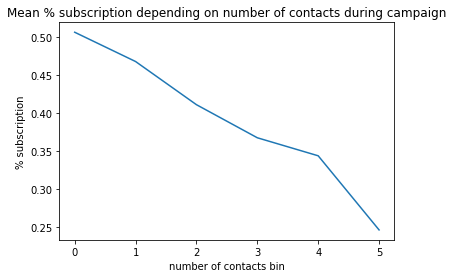

In [20]:
#introduce new column 'age_buckets' to  ''
data['campaign_bins'] = pd.qcut(data['campaign'], 20, labels=False, duplicates = 'drop')

#group by 'balance_bins' and find average campaign outcome per balance bin
mean_campaign = data.groupby(['campaign_bins'])['deposit_num'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts during campaign')
plt.xlabel('number of contacts bin')
plt.ylabel('% subscription')
plt.show()

In [21]:
data[data['campaign_bins'] == 2]['campaign'].min()

4

From the plot above we see that average subscription rate is below 50% if the number of contacts during the campaign exceeds 4.